**Part 2: Machine Learning Credit Approval Data**

For this part of the project, we will be looking at an Australian credit approval dataset where the aim is to train, test and evaluate the performance of different classifiers in predicting credit card approval.

The initial action I will take is reading the datset into a pandas dataframe as pandas is a renowned statistical package in python and provides many useful insights.

**Please note:** As this project was programmed on Google Colab, we have to read in the dataset through Google Drive.

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive') #load data through google drive
aus = pd.read_csv('/content/drive/My Drive/australian.csv')

#for markers use:
#import pandas as pd
# Replace 'file_path' with the actual path to your Excel file
#file_path = 'path_to_your_file/australian.xlsx'
#aus = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**<font size="5">Initial Summary</font>**


Having now successfuly imported the dataset, I will now provide a summary of the data to have a prelimary understanding.

In [3]:
aus.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


Fro the .describe() function we can see 'y' has a mean of 0.44 suggessting that approxiately 44% of the data has their credit approved. This function also displays the mean and variance of all the features *(x0,...,x13)*. Some notble observations include 'x13' having a varaince of 5210 suggesting that this data points are highly spread with a min and max of 1 and 10,000 respectively (shown in the plot below).

**Exploring the 'x13' variable**

Text(0, 0.5, 'Credit Approval')

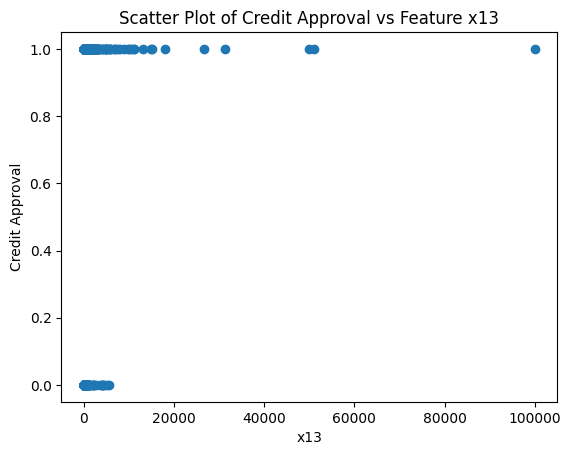

In [4]:
import matplotlib.pyplot as plt
plt.scatter(aus['x13'],aus['y'])
plt.title('Scatter Plot of Credit Approval vs Feature x13')
plt.xlabel('x13')
plt.ylabel('Credit Approval')

Whilst this plot highlights the spread of the 'x13' variable, it also suggests that a credit approval can be somewhat related to a high 'x13'. ]

Note: This feature should be investiagted for potential outliers.

**Correlation Heatmap**

I have decided to connstruct a heatmap of the data to easily visualise the correlation between the variables. From the plot below, we can see that the feature 'x7' has correlation of roughy 0.7 with our response variable 'y', initially suggesting this is the most important variable. There are many other plots we could of used from from the seaborn package including pairplots, violin plots and boxplots, however after testing all of these, the heatmap is the most informative and therefore I will not include the others in this report.

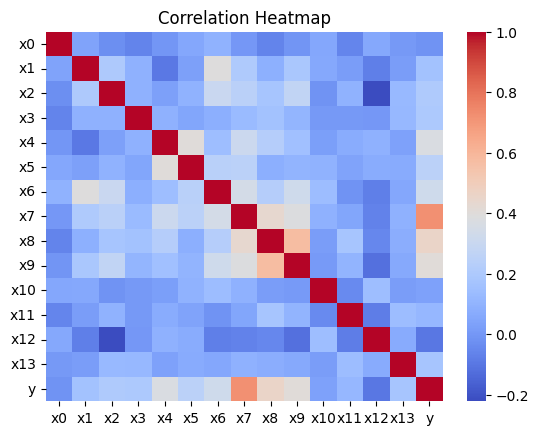

In [5]:
import seaborn as sns
correlation_matrix = aus.corr()
# Create a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Extracting the Design Matrix and Approval Score**

I will now extract the design matrix $X$ and the vector of labels 'y' from the data. This will allow me to create a train-test split of the data which I will scale appropriately in the code below:

In the train test split, I have chose the test_size parameter to be 0.2 as the dataset is fairly small. This means that 20% of the data will be used for testing.

In [6]:
from sklearn import preprocessing

X = aus.iloc[:,0:14] #design matrix
y = aus['y'] #credit approval
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train test split,
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)# standard scaling
X_test_scaled = scaler.transform(X_test)

This type of scaling subtracts the mean from each variable and scales each feature to a variance of one, this is known as standardizing.

**<font size="5">SVC with Default Paramaters</font>**


I will know construct a cross validation score of the SVC classifier with default parameters. The mean of this will provide us with a baseline score of what one can expect from a basic classifier without any tuning of hyperparameters.

In our case, this baseline score = 0.86

In [7]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #creating the train test split
scaler = preprocessing.StandardScaler()#scaling the data below
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_svc = svm.SVC()
scores = cross_val_score(clf_svc, X_train_scaled, y_train)
mean_score = np.mean(scores)

print("Mean cross validation score:",mean_score)

Mean cross validation score: 0.8605077805077805


**Confusion Matrix of default SVC**

I will also provide a confusion matrix of this basic classifier with default parameters.

The confusion matrix is


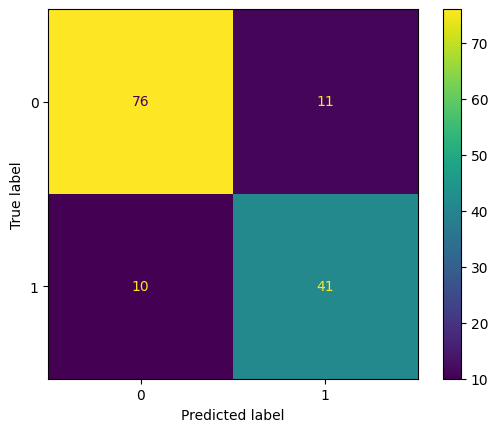


The classifier score is 0.8478260869565217


In [8]:
clf_svc = svm.SVC()

# Train the model, aka learn from the data
clf_svc.fit(X_train_scaled, y_train)

# Predict the value of y for any unseen example.
y_pred = clf_svc.predict(X_test_scaled)

# confusion matrix with colour and labels
print("The confusion matrix is")
cm = confusion_matrix(y_test, y_pred, labels=clf_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_svc.classes_)
disp.plot()
plt.show()

# print diagnostics to assess the prediction
print()
print("The classifier score is", clf_svc.score(X_test_scaled, y_test))

**<font size="5">Tuning the Linear and RBF kernels</font>**


We will know consider the linear and rbf kernels for the SVC classifier.

**First looking at the linear:**

Standard tuning of this kernel would
mean only tuning the regularisation parameter $C$.

Whilst the code below may seem overwhelming, we are essentially only doing two tasks. The first part of the code creates a plot which displays the mean cross-validation score with the corresponding $C$. I included this plot as it provides a visual performance (mean cross-validation scores) of the SVM classifier with different C values using a linear kernel. The second part uses the package GridSearchCV to computationaly find the best value of $C$.
This gives a value of $C$ = 0.01 which is also supported from the plot.

The best value of C is 0.01


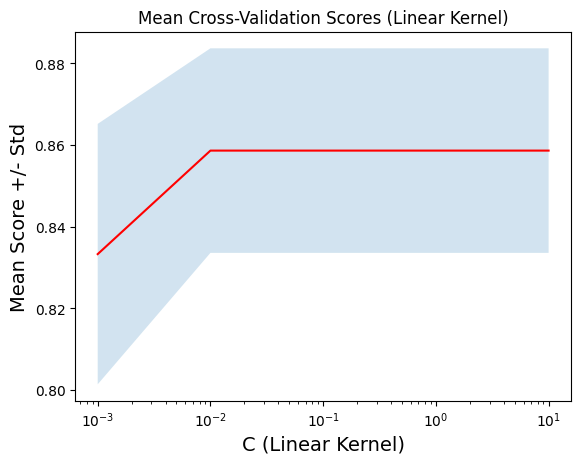

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
C_vals = [0.001, 0.01, 0.1, 1, 10]

score_mean_linear = []
score_std_linear = []

for C_val in C_vals:
    # Initialize the SVM classifier with the corresponding C value and linear kernel
    clf_linear = SVC(kernel='linear', C=C_val)
    # Perform cross-validation
    scores = cross_val_score(clf_linear, X_train_scaled, y_train, cv=5)
    # Record the mean and std of the scores
    score_mean_linear.append(scores.mean())
    score_std_linear.append(scores.std())

score_mean_linear = np.array(score_mean_linear)
score_std_linear = np.array(score_std_linear)

# Plotting for linear kernel
plt.semilogx(C_vals, score_mean_linear, 'r')
plt.fill_between(C_vals, score_mean_linear - score_std_linear, score_mean_linear + score_std_linear, alpha=0.2)
plt.xlabel("C (Linear Kernel)", fontsize="14")
plt.ylabel("Mean Score +/- Std", fontsize="14")
plt.title('Mean Cross-Validation Scores (Linear Kernel)')


# Define a range of C values to test
param_grid_linear = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the SVM classifier with linear kernel
svc_linear = SVC(kernel='linear')

# Use GridSearchCV to find the best C value using cross-validation
grid_linear = GridSearchCV(svc_linear, param_grid_linear, cv=5)
grid_linear.fit(X_train_scaled, y_train)

# Get the best C value for the linear kernel
best_C_linear = grid_linear.best_params_['C']
print(f"The best value of C is {best_C_linear}")
plt.show()

**Now looking at the rbf kernel:**

Standard tuning of this kernel would mean tuning both $C$ and the scale parameter $Gamma$.

Whilst the code below takes approximately eight seconds to run, it provides us with very useful reuslts. Much similar to before, our plot displays the mean cross-validation scores. However, this time, we display the scores for both $C$ and $Gamma$. We then, as before, use GridSearchCV to computationaly find the optimal $C$ and $Gamma$ which is again supported by the plot.

This gives $C$ = 0.1 and $Gamma$ = 0.1

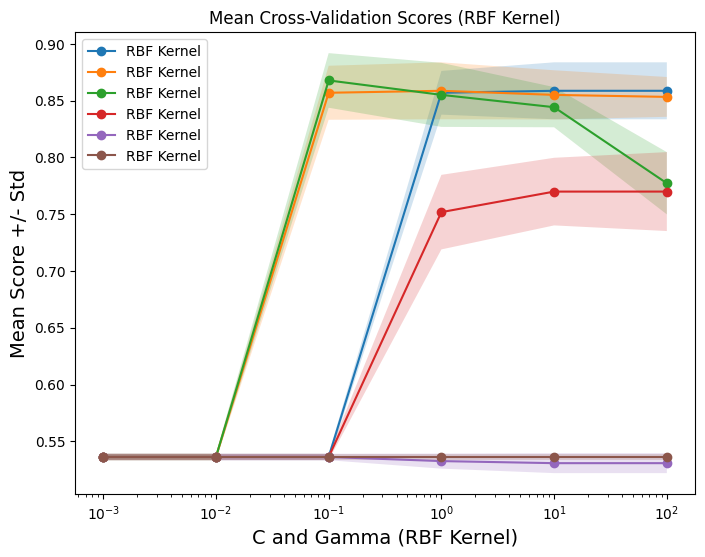

The best value of C for RBF kernel is 0.1
The best value of gamma for RBF kernel is 0.1


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define a range of C values to test for the RBF kernel
param_grid_rbf = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the SVM classifier with RBF kernel
svc_rbf = SVC(kernel='rbf')

# Use GridSearchCV to find the best C and gamma values using cross-validation
grid_rbf = GridSearchCV(svc_rbf, param_grid_rbf, cv=5)
grid_rbf.fit(X_train_scaled, y_train)

# Get the best C and gamma values for the RBF kernel
best_C_rbf = grid_rbf.best_params_['C']
best_gamma_rbf = grid_rbf.best_params_['gamma']

# Plotting for RBF kernel
plt.figure(figsize=(8, 6))

score_mean_rbf = grid_rbf.cv_results_['mean_test_score']
score_std_rbf = grid_rbf.cv_results_['std_test_score']

score_mean_rbf = score_mean_rbf.reshape(len(param_grid_rbf['C']), len(param_grid_rbf['gamma']))
score_std_rbf = score_std_rbf.reshape(len(param_grid_rbf['C']), len(param_grid_rbf['gamma']))

plt.semilogx(param_grid_rbf['C'], score_mean_rbf, marker='o', label='RBF Kernel')

for i, val in enumerate(param_grid_rbf['C']):
    plt.fill_between(param_grid_rbf['C'], score_mean_rbf[:,i] - score_std_rbf[:,i],
                     score_mean_rbf[:,i] + score_std_rbf[:,i], alpha=0.2)

plt.xlabel("C and Gamma (RBF Kernel)", fontsize="14")
plt.ylabel("Mean Score +/- Std", fontsize="14")
plt.title('Mean Cross-Validation Scores (RBF Kernel)')
plt.legend()
plt.show()

# Print the best C and gamma values for the RBF kernel
print(f"The best value of C for RBF kernel is {best_C_rbf}")
print(f"The best value of gamma for RBF kernel is {best_gamma_rbf}")


**<font size="5">Comparing the Tuned Linear and RBF Kernels</font>**

Now that we have tuned parameters for both classifiers, we can begin to compare.

The first step I will take is to generate confusion matricies and classification reports.

Confusion matrix for Linear Kernel:


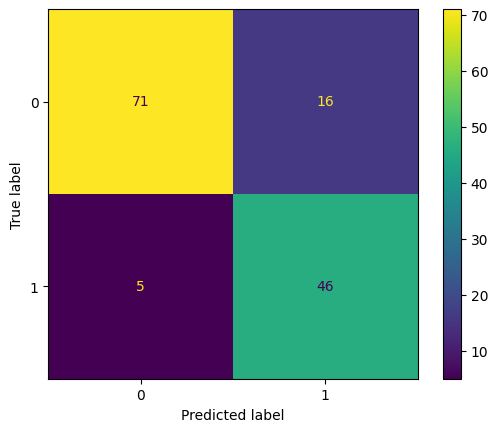

Classifier score for Linear Kernel: 0.8478260869565217
Confusion matrix for RBF Kernel:


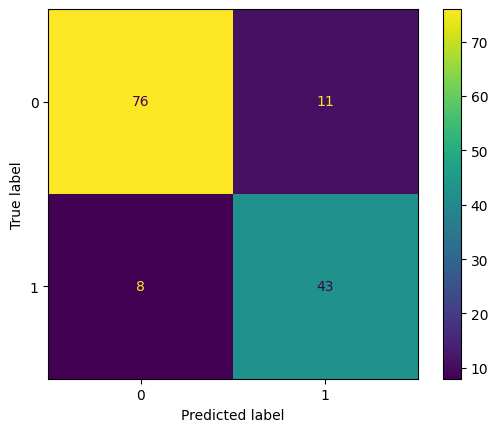

Classifier score for RBF Kernel: 0.8623188405797102


In [11]:
# Initialize the SVM classifiers with the tuned parameters
clf_linear = SVC(kernel='linear', C=best_C_linear)
clf_rbf = SVC(kernel='rbf', C=best_C_rbf, gamma=best_gamma_rbf)

# Fit the models to the training data
clf_linear.fit(X_train_scaled, y_train)
clf_rbf.fit(X_train_scaled, y_train)

# Predictions using tuned classifiers
y_pred_linear = clf_linear.predict(X_test_scaled)
y_pred_rbf = clf_rbf.predict(X_test_scaled)

# Confusion matrix and score for linear kernel
print("Confusion matrix for Linear Kernel:")
cm_linear = confusion_matrix(y_test, y_pred_linear, labels=clf_linear.classes_)
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=clf_linear.classes_)
disp_linear.plot()
plt.show()

print("Classifier score for Linear Kernel:", clf_linear.score(X_test_scaled, y_test))

# Confusion matrix and score for RBF kernel
print("Confusion matrix for RBF Kernel:")
cm_rbf = confusion_matrix(y_test, y_pred_rbf, labels=clf_rbf.classes_)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=clf_rbf.classes_)
disp_rbf.plot()
plt.show()

print("Classifier score for RBF Kernel:", clf_rbf.score(X_test_scaled, y_test))


Since the goal of our classifier is to predict credit approval, we care far more about false positives than we do false negatives. This is because companies prioritise minimising risk and mitigating financial loss compared to rejected someone that might have been creditworthy.

The tuned linear classifier has a classifier score of 0.85 which is very similar to our baseline score. This means the model has an respectable accuracy of 85%. However, it does have 16 cases of false positives. This means that approximately 12% of the tested data recieved credit approval when they should not have, which is very bad in this context.

The tuned rbf model has a slighly higher classifier score of 0.86 and has a lower number of 11 false positives. Whilst this is much lower than the linear, this still suggests that 8% of the tested data recieved a false positive. Typically, credit rating agencies want the lowest possible rate, suggesting that 8% is still too high, even though the model has an accuracy of 86%.

**Classification reports**

The following code is used to generate classification reports:

In [12]:
from sklearn.metrics import classification_report
y_pred_linear = clf_linear.predict(X_test)
# Print classification report for evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))

y_pred_rbf = clf_rbf.predict(X_test)
# Print classification report for evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        87
           1       0.59      0.75      0.66        51

    accuracy                           0.72       138
   macro avg       0.71      0.72      0.71       138
weighted avg       0.74      0.72      0.72       138

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.37      1.00      0.54        51

    accuracy                           0.37       138
   macro avg       0.18      0.50      0.27       138
weighted avg       0.14      0.37      0.20       138



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classificatio

From these reports we can see that the linear kernel seems to provide a more balanced performance across both classes (0 & 1), with reasonable precision and recall for both.
The RBF kernel shows a trade-off between precision and recall, performing well in recall for Class 1 but poorly in precision, especially for Class 0, resulting in an imbalanced performance. This may be confusing as RBF has a higher classification score, however further analysing the confusing matrix, we can see that the RBF makes more mistakes with eligible people than the linear classifier. This is essentially more false negatives and less true negatives.
Although this is the case, in our context of credit approval, we would still prefer the RBF classifier when compared to the linear due to the lower number of false positives.

**<font size="5">Boundary Visualisation Plots</font>**


Before moving on from these classifiers, I will provide two boundary visualisation plots which demonstrate how the different classifiers seperate the data, as I believe it is very beneficial and useful for this project. For ease of visuality, I will only look at two features 'x7' and 'x9'. I chose 'x7' as it has the highest correlation with 'y' and after plotting all pairwise plots with 'x7', 'x9' provided the easiest to visualise.

**Please note:** The below code takes approximately 10 seconds to run.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


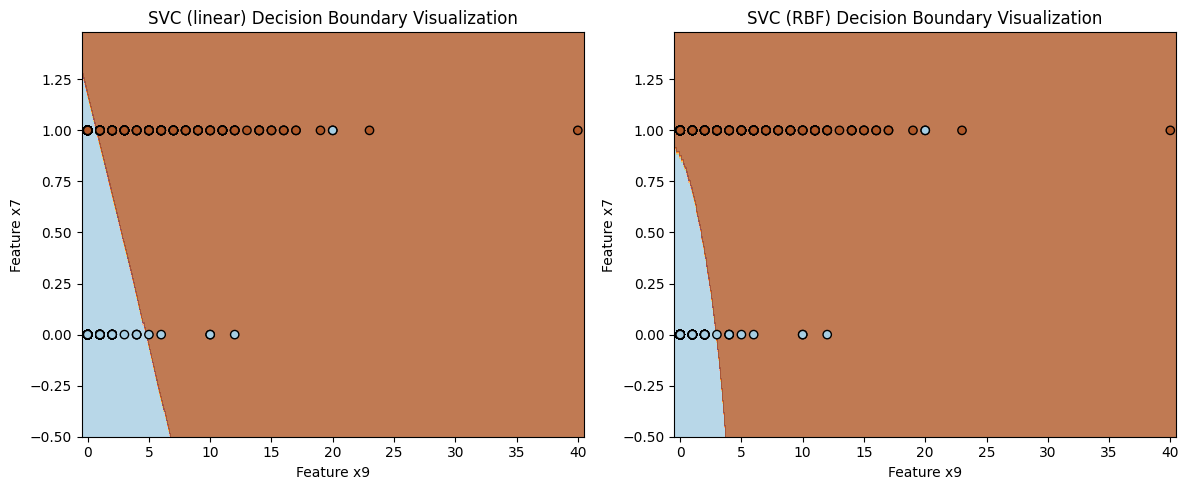

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Extracting the first two columns for visualization
X_train_subset = X_train[['x9', 'x7']]

# Computing min and max values for the two columns
x0_min, x0_max = X_train_subset['x9'].min() - 0.5, X_train_subset['x9'].max() + 0.5
x1_min, x1_max = X_train_subset['x7'].min() - 0.5, X_train_subset['x7'].max() + 0.5

h = .02  # step size in the mesh

# Creating a meshgrid using the min and max values of the first two columns
XX, YY = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

# Reshaping the meshgrid to match the model's input format
mesh_data = np.c_[XX.ravel(), YY.ravel()]

# Train an SVC model on the subset of columns
clf_svc = SVC(kernel='linear', C=0.01)
clf_svc.fit(X_train_subset, y_train)

# Use the trained SVC model to predict on the mesh grid
Z_svc = clf_svc.predict(mesh_data)
Z_svc = Z_svc.reshape(XX.shape)

# Train rbf on the subset of columns
clf_rbf
clf_rbf.fit(X_train_subset, y_train)

# Use the trained rbf model to predict on the mesh grid
Z_rbf = clf_rbf.predict(mesh_data)
Z_rbf = Z_rbf.reshape(XX.shape)

# Plotting both decision boundaries side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting SVC decision boundary
axes[0].contourf(XX, YY, Z_svc, cmap=plt.cm.Paired, alpha=0.8)
axes[0].scatter(X_train_subset['x9'], X_train_subset['x7'], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
axes[0].set_xlabel('Feature x9')
axes[0].set_ylabel('Feature x7')
axes[0].set_title('SVC (linear) Decision Boundary Visualization')

# Plotting rbf decision boundary
axes[1].contourf(XX, YY, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
axes[1].scatter(X_train_subset['x9'], X_train_subset['x7'], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
axes[1].set_xlabel('Feature x9')
axes[1].set_ylabel('Feature x7')
axes[1].set_title('SVC (RBF) Decision Boundary Visualization')

plt.tight_layout()
plt.show()

Whilst both plots look similar, we can easily interpret the pattern that the model has indentified. The linear has provided a simple straight line classifier which splits the data up with the majority of blues in the bottom left. However, where the RBF is superior, the linear fails to taper off in the top left leading to more false negatives. We also note that RBF does miss a lot of blue points in bottom left, displaying clearly why the RBF has a higher number of false negtaives. This type of error normally occurs in overfitting small datasets.

**<font size="5">Other Classifiers</font>**


We will now start to consider other classififers form the scikit-learn library.

**The first: MLP classifier**

Initially, I will generate a confusin matrix and classification report with default paramters in the code below:

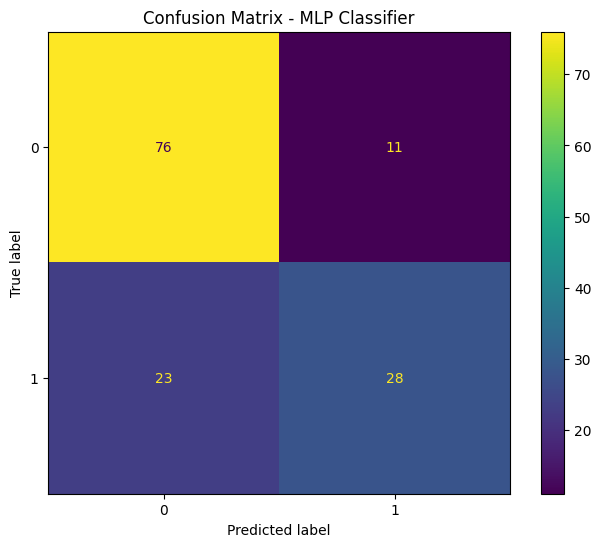

Classification score: 0.7536231884057971
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        87
           1       0.72      0.55      0.62        51

    accuracy                           0.75       138
   macro avg       0.74      0.71      0.72       138
weighted avg       0.75      0.75      0.75       138

Mean of scores: 0.8495986895986898


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' are defined

# Create MLPClassifier using all features
clf_mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500)
clf_mlp.fit(X_train, y_train)

# Use the trained classifier to predict on the test data
y_pred = clf_mlp.predict(X_test)



# Calculate and display the confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=clf_mlp.classes_)
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figsize as needed
disp_mlp.plot(ax=ax)
plt.title('Confusion Matrix - MLP Classifier')
plt.show()
classification_score = clf_mlp.score(X_test, y_test)
print(f"Classification score: {classification_score}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

scores_mlp = cross_val_score(clf_mlp, X_train_scaled, y_train) # finds the mean score
print(f"Mean of scores: {np.mean(scores_mlp)}")


Whilst the mean score is fairly high, running this code mutiple times one can see this confusion matrix can change durastically. The reason for this is because the dataset is fairly small which is causing the MLP to overfit the data.

**<font size="5">Tuning the MLP</font>**

 I will now look at tuning the parameters in MLP in the code below:

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search through
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    # Add other hyperparameters like activation function, solver, etc., if needed
}

# Create the MLP classifier
clf = MLPClassifier(max_iter=500)

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the classifier with the best parameters on the full training set
best_clf = MLPClassifier(max_iter=500, **best_params)
best_clf.fit(X_train, y_train)
(best_params)


{'hidden_layer_sizes': (50,)}

From the output of this code, we see that our tuned hidden layer size is (50,). Not included in this notebook, I have investigated many other hidden layer combinations. Nearly all of the ones I tested gave 9 false positives, however (50,) provided the lowest consistent false negatives of 17 and consistnetly obtained the highest classification score.

**Confusion Matrix**

Now, generating a confusion matrix with tuned parameters:

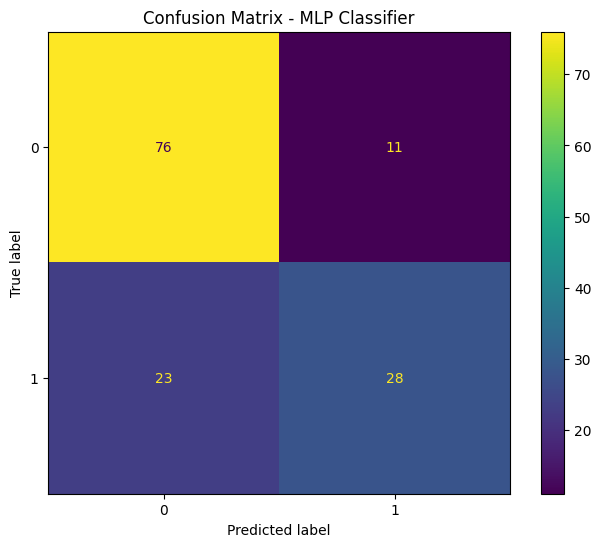

Classification score: 0.8115942028985508
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        87
           1       0.76      0.73      0.74        51

    accuracy                           0.81       138
   macro avg       0.80      0.79      0.80       138
weighted avg       0.81      0.81      0.81       138



In [21]:
clf_mlp_tun = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)
clf_mlp_tun.fit(X_train, y_train)

# Use the trained classifier to predict on the test data
y_pred_tun = clf_mlp_tun.predict(X_test)

# Calculate and display the confusion matrix
cm_mlp_tun = confusion_matrix(y_test, y_pred_tun)
disp_mlp_tun = ConfusionMatrixDisplay(confusion_matrix=cm_mlp_tun)
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figsize as needed
disp_mlp.plot(ax=ax)
plt.title('Confusion Matrix - MLP Classifier')
plt.show()
classification_score_tun = clf_mlp_tun.score(X_test, y_test)
print(f"Classification score: {classification_score_tun}")

print("Classification Report:")
print(classification_report(y_test, y_pred_tun))


Here, we can see that the MLP is much less volitile than before and provides a classification score with approximately 0.86. However, this classifier typically has 10 false positives, which whislt is lower than the linear classifier, the RBF is still superior. This model also has a very high number of false negatives which clearly shows that for this specific dataset, the MLP model does struggle. The only reason why this model has a high classification score is due to it's very accuracy in true positives. Therefore when including this classifier, I would still choose the RBF.

**<font size="5">Boundary Visualisation Plots for MLP</font>**

I will now provide a boundary visualisation plot similar to what we did for the linear and RBF classifiers. To stay consistent, I will again only consider features 'x9' and 'x7'.

The plot below shows very clearly the difference between the MLP classifier with the linear. As implyed the name, the linear fails to curve / flexibly adapt and conform to the data's shape, while the MLP does a very good job, in this specific scenario only mistreating one (difficult) point. At first, this may seem quite contradictory as we are still rejecting the MLP despite the high classification score and great decision boundry (shown below). However, this is only looking at two features which give the best results. I have plotted the other features not in the notebook which does demonstrate the faults of this classifcation. This is primarly due to overfitting as the dataset is fairly small and we have only trained our models on 80% of the data.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


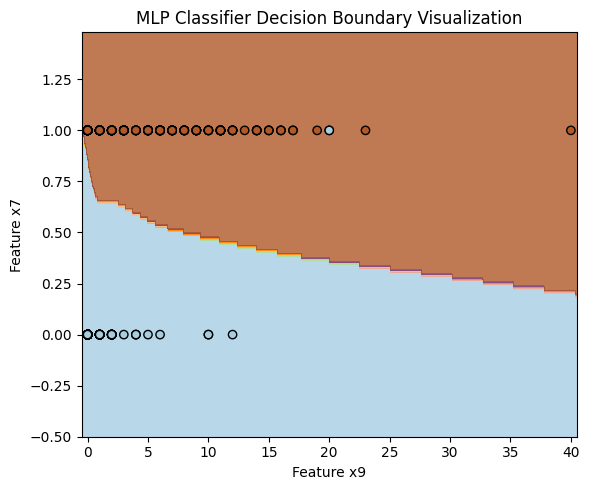

In [22]:
X_train_subset = X_train[['x9', 'x7']]

# Computing min and max values for the two columns
x0_min, x0_max = X_train_subset['x9'].min() - 0.5, X_train_subset['x9'].max() + 0.5
x1_min, x1_max = X_train_subset['x7'].min() - 0.5, X_train_subset['x7'].max() + 0.5

h = .02  # step size in the mesh

# Creating a meshgrid using the min and max values of the first two columns
XX, YY = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

# Reshaping the meshgrid to match the model's input format
mesh_data = np.c_[XX.ravel(), YY.ravel()]

# Train an MLPClassifier on the subset of columns
clf_mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500)
clf_mlp.fit(X_train_subset, y_train)

# Use the trained MLPClassifier model to predict on the mesh grid
Z_mlp = clf_mlp.predict(mesh_data)
Z_mlp = Z_mlp.reshape(XX.shape)

# Plotting the MLP decision boundary
plt.figure(figsize=(6, 5))
plt.contourf(XX, YY, Z_mlp, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train_subset['x9'], X_train_subset['x7'], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Feature x9')
plt.ylabel('Feature x7')
plt.title('MLP Classifier Decision Boundary Visualization')
plt.tight_layout()
plt.show()

**<font size="5">Decision Tree</font>**


Now looking at another classifier form the scikit-learn library: The Decision Tree classifier:

A great advantage of this classifier is it's simplicity and the fact that it is really easy to interpret. (Diagram below)

**Note:** To be succint, I have tested this classifier outside this notebook and found that a max depth of 5, yields the best results.

I will first start as before by generating a confusion matrix and then later epxlaining specifically how this classifier works.

Accuracy score for Decision Tree Classifier: 0.8768
Confusion Matrix for Decision Tree Classifier:


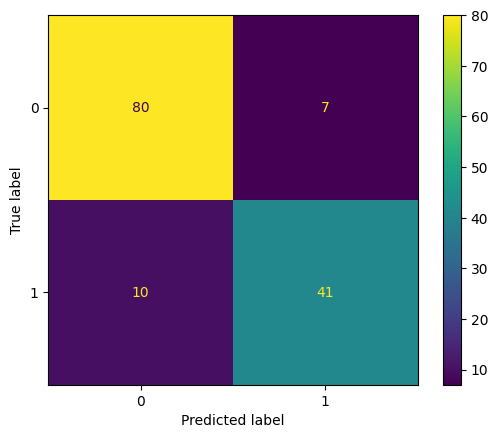

In [26]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the DecisionTreeClassifier with optional hyperparameters
tree_classifier = DecisionTreeClassifier(max_depth=5, criterion='gini')
# Train the DecisionTreeClassifier on the training data
tree_classifier.fit(X_train_scaled, y_train)
# Predict using the trained DecisionTreeClassifier
y_pred_tree = tree_classifier.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy score for Decision Tree Classifier: {accuracy_tree:.4f}")

# Generate confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix for Decision Tree Classifier:")
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree_classifier.classes_)
disp_tree.plot()


From the output above, we can see the Decision Tree classifier has a very high score of 0.88 suggesting the model is 88% accurate. More importanly this model has an average of 7 false positives suggesting approximately only 5% of tested data would be wrongfully approved credit. This is much lower than any other classifier we have seen.

As our dataset is quite small, we would expect this simpler model to perform well.

**Visualising the Tree**

Rather than providing a boundry visualisation plot, I will construct the decision tree to easily demonstrate what this classifier does. Please note, for this plot, I am changing max depth to be 2 for easy of visualality.

Please see code below:

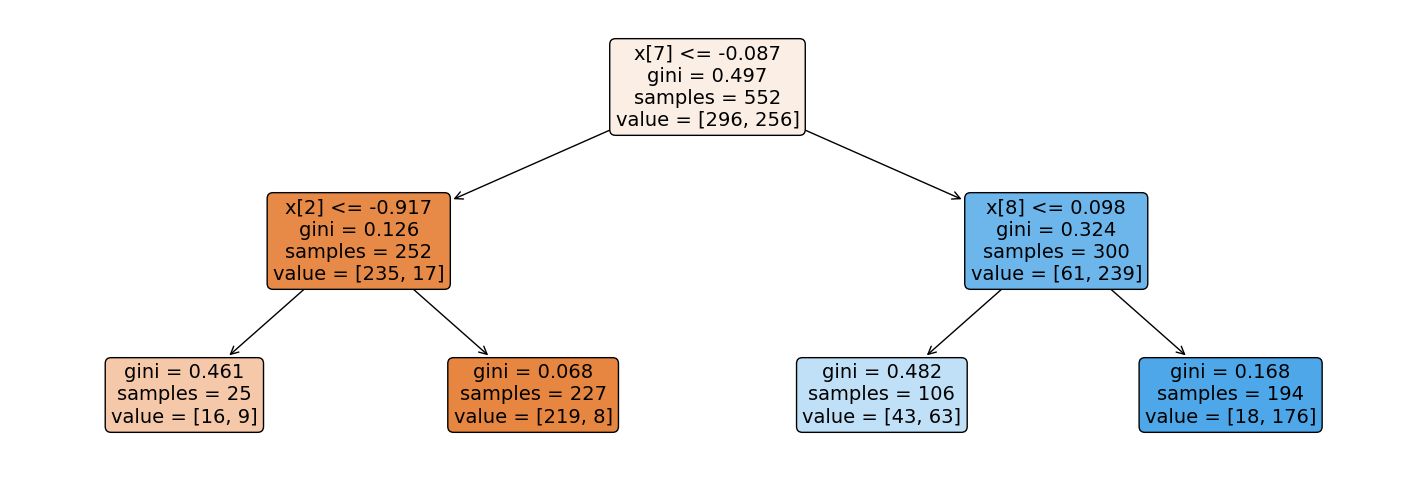

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_classifier_for_plot = DecisionTreeClassifier(max_depth=2, criterion='gini') #changing max depth = 2 for visual help
tree_classifier_for_plot.fit(X_train_scaled, y_train)

fig, ax = plt.subplots(figsize=(18, 6))
plot_tree(tree_classifier_for_plot,
          filled=True,
          rounded=True,
          fontsize=14)
plt.show()

This diagram is extremely useful to understanding this classifier.

From this tree, we can easily see how this classifier works. The first step it looks at is whether the scaled data is less than or equal to approximatley 0, if true, then proceeds to the right and is faced with a new decision. The value represents how many points are in each class (0 or 1). This sums up to 552 as we used 80% of our data to train our model (80% * 690 = 552). If we take just the first decision, this implys that 256 data points recieved credit approval where 296 did not. This implys that roughly 40% recieved credit approval which is similar to an observation we made at the start of this project where we saw that 44% of the data had credit approval.

**<font size="5">Random Forest</font>**


I will now begin to look at another scikit-learn classifier: The Random Forest

While Decision Trees and Random Forest are somewhat similar, it is important to understand thier differnces. While Decision Trees construct a single tree-like structure by recursively splitting the dataset based on decisions at each node, Random Forest operates as an ensemble of multiple decision trees. Unlike Decision Trees, Random Forest creates each tree using random subsets of the dataset (and features).

This ensemble approach significantly reduces overfitting, enhances generalization, and mitigates the high variance often associated with individual Decision Trees, resulting in an improved predictive performance and robustness against noise and outliers in the data.

Therefore initially, we would expect this classifier to outperfom the Decision Tree.

Now, constructing the confusion matrix and report as before:

Accuracy score for Decision Tree Classifier: 0.8768
Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91        87
           1       0.87      0.78      0.82        51

    accuracy                           0.88       138
   macro avg       0.88      0.86      0.86       138
weighted avg       0.88      0.88      0.88       138



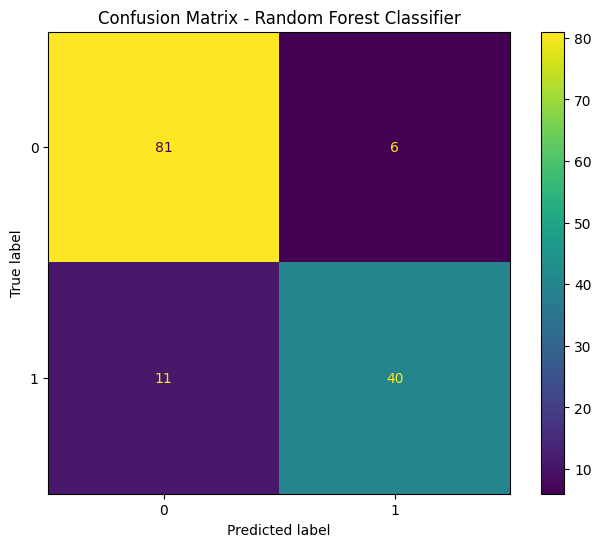

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' are defined

# Create RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)

# Use the trained classifier to predict on the test data
y_pred_rf = clf_rf.predict(X_test)

# Calculate accuracy
accuracy_tree_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy score for Decision Tree Classifier: {accuracy_tree_rf:.4f}")


# Print classification report for evaluation
print("Random Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate and display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=clf_rf.classes_)
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figsize as needed
disp_rf.plot(ax=ax)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


From the above matrix, we can see that as expected this classifier as a higher overall accuracy score of 88% but most importantly has on average of 6 / 7 false positives which in this credit approval scenario is the most important factor. Worth noting, this classifier also has an expectional high number of true negatives compated to other classifiers.

This model is more complex than the Decision Tree, however, actually reduces overfitting as mentioned and explained earlier. Therefore, out of all the classifiers tested, I believe the Random Forrest is best suited for the structure of this credit approval dataset.

**<font size="5">Most Important Features</font>**


I will finally investigate the most important features of this dataset in determining credit approval. I will be using the seaborn package as it significantly improves visualisation.

To start with, I will use the permutation_importance function considering specific classifiers.

Please note: I have considered many types of plots including boxplots, violin plots and many others and agree that the following is the best to visually intepret.

Please see code and plots below:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


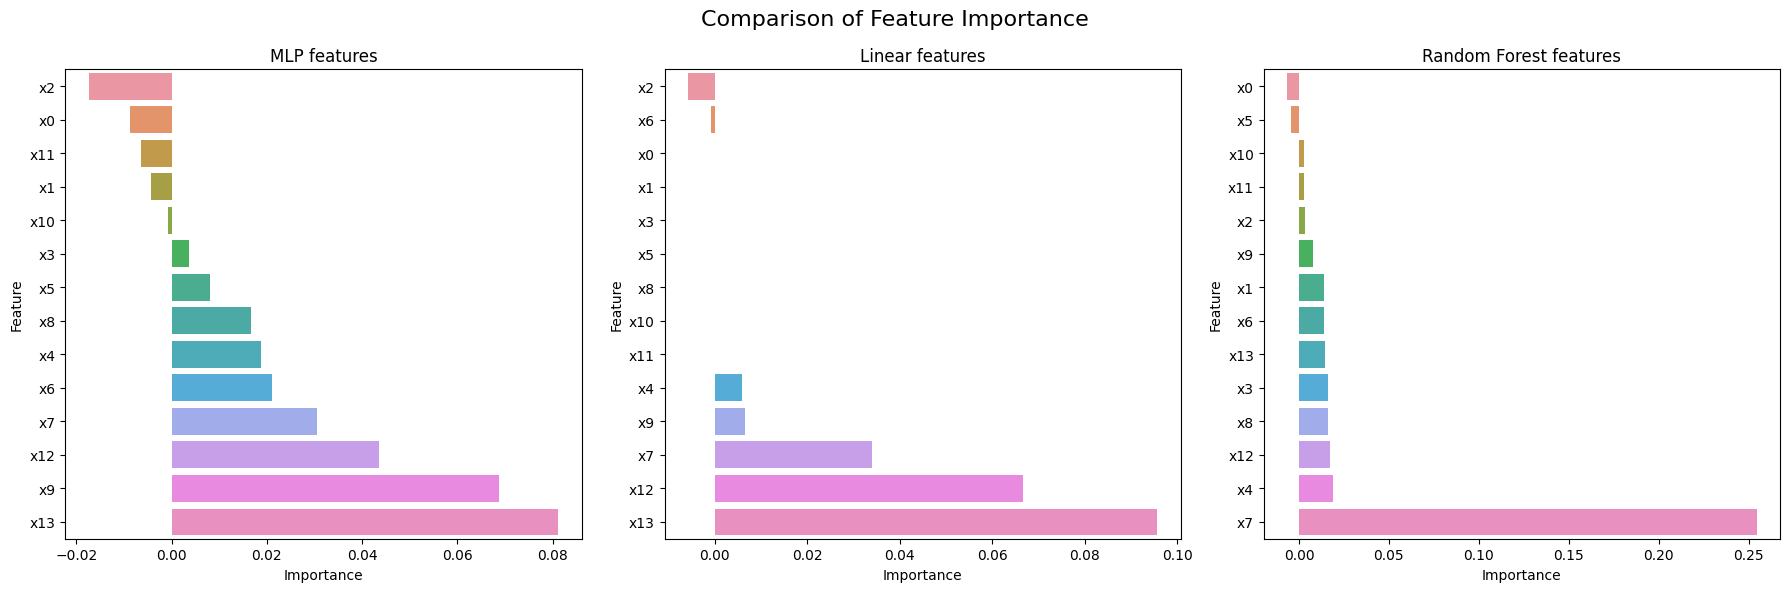

In [28]:
import seaborn as sns
from sklearn.inspection import permutation_importance

# Assuming clf_mlp_tun, clf_linear, and clf_rf are already trained models

# Getting permutation importance for each classifier
classifiers = [clf_mlp_tun, clf_linear, clf_rf]
classifier_titles = ['MLP features', 'Linear features', 'Random Forest features']
plt.figure(figsize=(18, 6))

for idx, clf in enumerate(classifiers):
    result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    sorted_idx = result.importances_mean.argsort()
    perm_importance_df = pd.DataFrame({
        'Feature': X_test.columns[sorted_idx],
        'Importance': result.importances_mean[sorted_idx]
    })

    # Create subplots for each classifier
    plt.subplot(1, 3, idx+1)
    sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
    plt.title(classifier_titles[idx])  # Set individual titles

# Set different titles for subplots
plt.suptitle("Comparison of Feature Importance", fontsize=16)  # Overall title for all subplots

plt.tight_layout()
plt.show()



From this output we can see that these 3 classifiers all have different 'most important' features, however, one commonality is that feature 'x7' does appear in the top 3 for each classifier. It is worth noting, that at the start of this project we saw that 'x7' also had the highest correlation with our response variable, further highlighting its significance.

The classifiers do all agree that 'x2' is by far the most insignificant feature.

As shown earlier in this project, the Decision Tree classifier also has feature 'x7' as the most important. As Random Forest and Decision Tree both have the highest overall classification scores and the lowest number of false positives, it is clear that in this dataset 'x7' is the most important feature.

**Exploring 'x7' with a count plot**

We can further explore this feature with the count plot below:

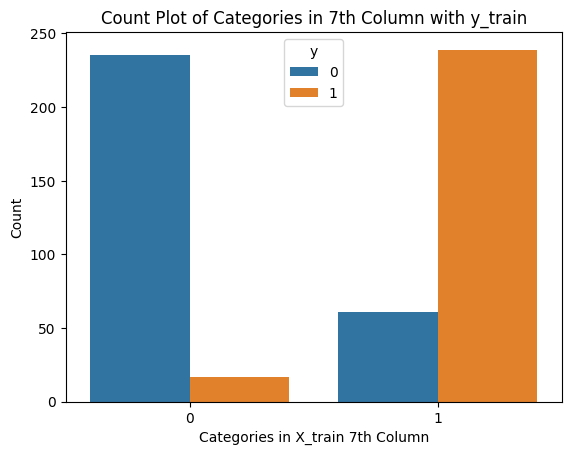

In [29]:
import seaborn as sns
sns.countplot(x=X_train['x7'], hue=y_train)
plt.xlabel('Categories in X_train 7th Column')
plt.ylabel('Count')
plt.title('Count Plot of Categories in 7th Column with y_train')
plt.show()


This count plot clearly displays the relationship between credit approval and the binary feature 'x7'. This tells us that the majority of people that have an 'x7' of 0 are more likely to get rejected, where as an 'x7' of 1 is more likely to recieve credit approval. The plot also highlights that this feature is very good at determining credit approval due to the overwhelming 'bar size' difference.

**<font size="5">Summary</font>**

Having tested a number of classifiers for this Credit Approval dataset, it is clear that the Random Forest classifier predicts credit approval with the highest accuracy and more importanly, the lowest consistent number of false positives. In this project, we have seen how each classifier works, as well as which features it finds to be most important, where they typically all agree that feature 'x7' is the most important.

Now, this does not mean that the other classifiers are not good, we are simply stating that for a dataset of this structure with predominately binary variables with a binary outcome, the Random Forest classifier is preffered due to it's accuracy, lower complexity and  the significant number of low false positives.
